<a href="https://colab.research.google.com/github/francesco-source/DeepLearning/blob/main/6_Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this tutorial we try to explain the relevance of convolutions for extracting relevant featues from images.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
image = cv2.imread('la-scuola-di-Atene.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, figsize=(12,8))

plt.imshow(image)

Our first kernel is just menta to compute horizontal derivatives.


In [ ]:
kernel = np.zeros((3,3))
kernel[:,0] = -1
kernel[:,2] = 1
kernel

array([[-1.,  0.,  1.],
       [-1.,  0.,  1.],
       [-1.,  0.,  1.]])

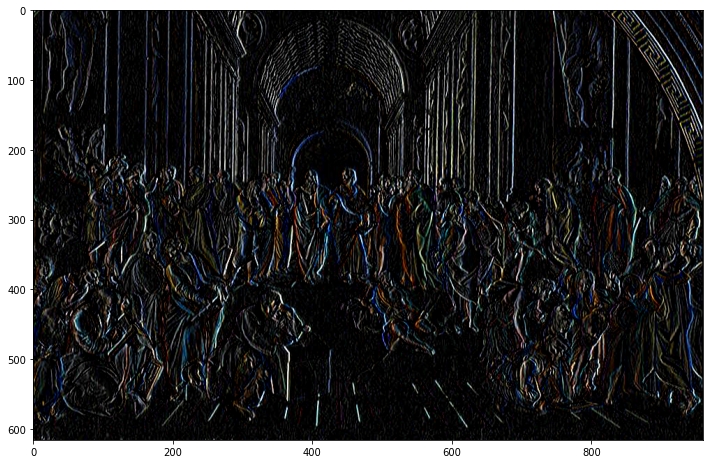

In [ ]:
img = cv2.filter2D(image, -1, kernel)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(img)

Next one is the vertical derivative.

In [ ]:
kernel = np.zeros((3,3))
kernel[0,:] = -1
kernel[2,:] = 1
kernel

array([[-1., -1., -1.],
       [ 0.,  0.,  0.],
       [ 1.,  1.,  1.]])

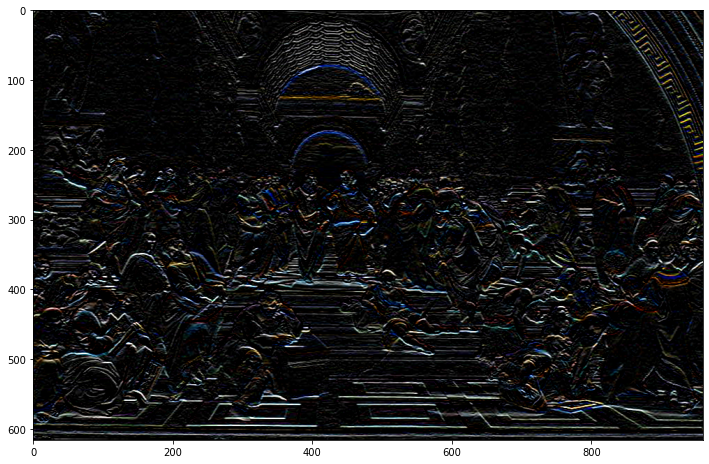

In [ ]:
img = cv2.filter2D(image, -1, kernel)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(img)

Blurring.

In [ ]:
kernel = np.ones((7, 7), np.float32) / 49

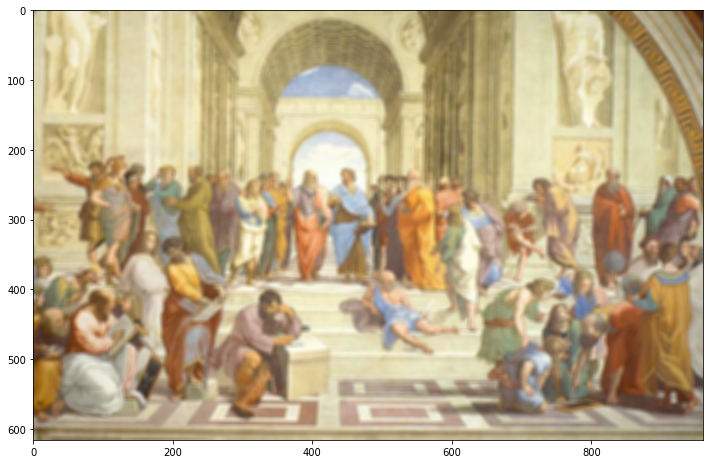

In [ ]:
img = cv2.filter2D(image, -1, kernel)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(img)

In [ ]:
kernel = np.ones((3, 3), np.float32) / 9

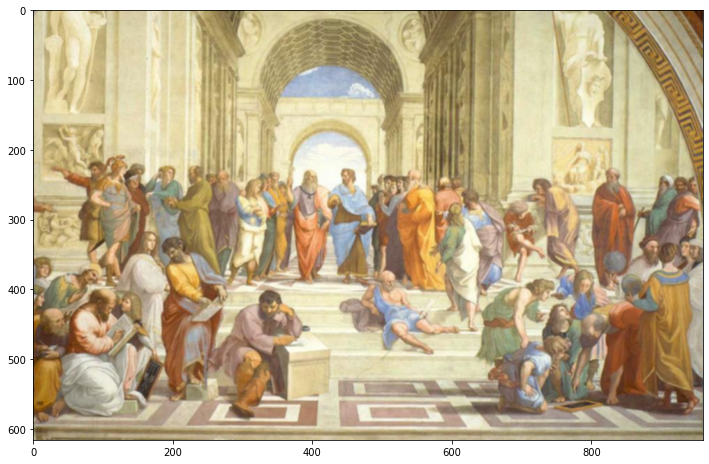

In [ ]:
img2 = cv2.filter2D(image, -1, kernel)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(img2)


Difference between blurrings (simulating the difference between two visions of a same eimage with slightly different focal distances)

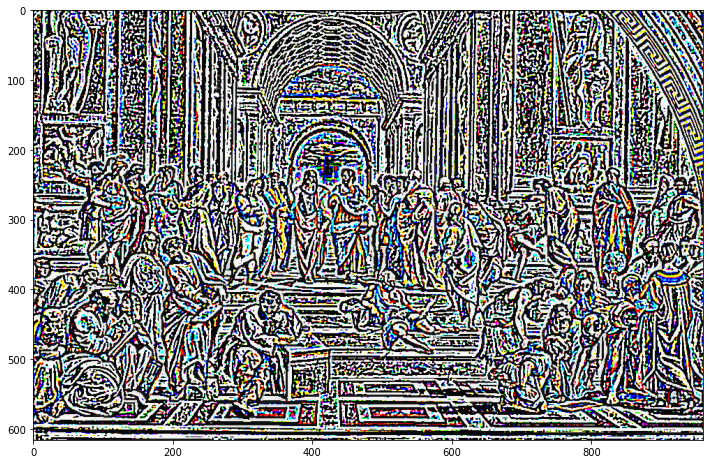

In [ ]:
img3 = img - img2
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(img3)

Sum of derivatives

In [ ]:
kernel = np.zeros((3,3))
kernel[0,1] = kernel[1,0] = -1
kernel[2,1] = kernel[1,2] = 1
kernel

array([[ 0., -1.,  0.],
       [-1.,  0.,  1.],
       [ 0.,  1.,  0.]])

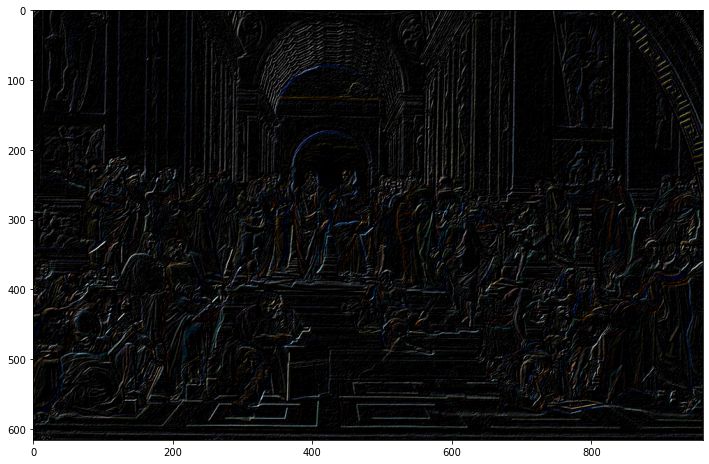

In [ ]:
img = cv2.filter2D(image, -1, kernel)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(img)

Finite Laplacian

In [ ]:
kernel = np.zeros((3,3))
kernel[0,1] = kernel[1,0] = kernel[2,1] = kernel[1,2] = -1
kernel[1,1] = 4
kernel

array([[ 0., -1.,  0.],
       [-1.,  4., -1.],
       [ 0., -1.,  0.]])

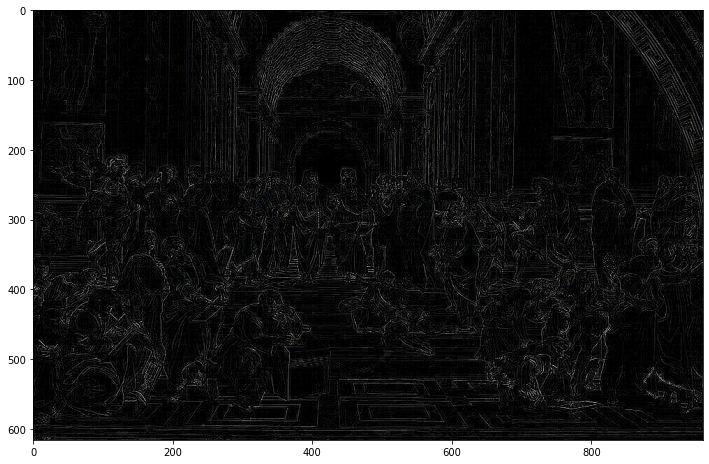

In [ ]:
img = cv2.filter2D(image, -1, kernel)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(img)

Identity

In [ ]:
id = np.zeros((3,3))
id[1,1] = 1
id

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

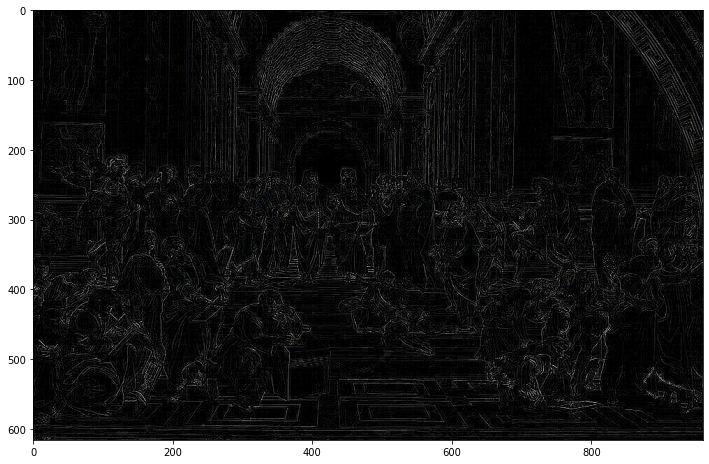

In [ ]:
img = cv2.filter2D(image, -1, kernel)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(img)

Reinforcement

In [ ]:
kernel2 = np.zeros((3,3))
kernel2[0,1] = kernel2[1,0] = kernel2[2,1] = kernel2[1,2] = -1
kernel2[1,1] = 5
kernel2

array([[ 0., -1.,  0.],
       [-1.,  5., -1.],
       [ 0., -1.,  0.]])

In [ ]:
assert(kernel2 == (kernel + id)).all()

In [ ]:
img = cv2.filter2D(image, -1, kernel2)
fig, ax = plt.subplots(1,2, figsize=(24,8))
ax[0].imshow(img);
ax[1].imshow(image);

Embossing

In [ ]:
kernel = np.array([[-2,-1,0],
                   [-1,1,1],
                   [0,1,2]])

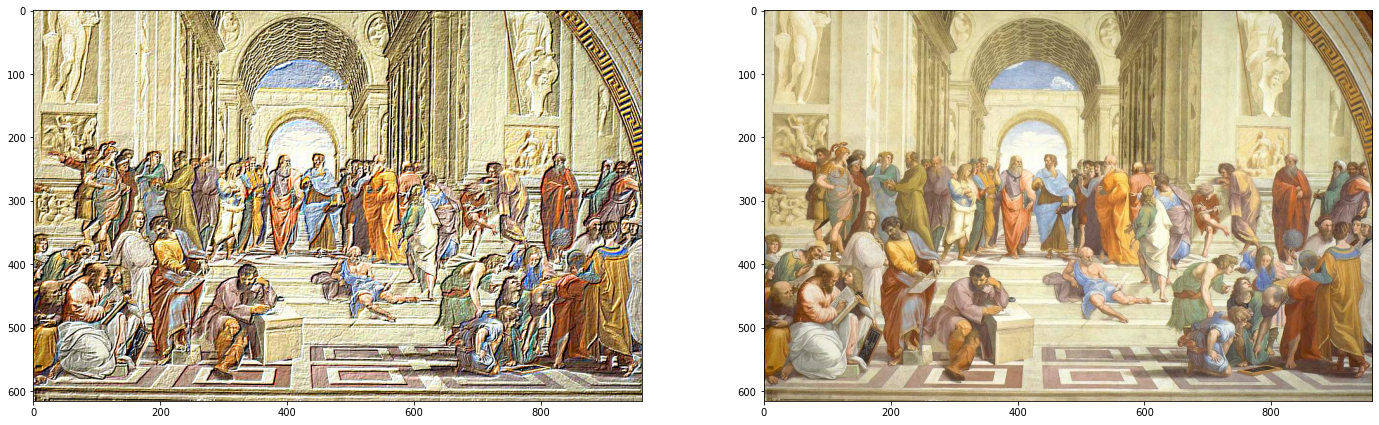

In [ ]:
img = cv2.filter2D(image, -1, kernel)
fig, ax = plt.subplots(1,2, figsize=(24,8))
ax[0].imshow(img);
ax[1].imshow(image);